In [1]:
!pip install tensorflow matplotlib

In [ ]:
!pip install tensorflow_hub


C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


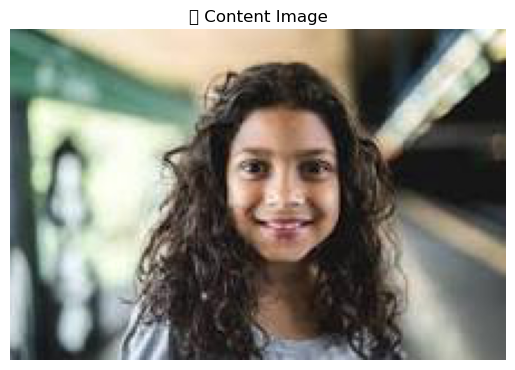

C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


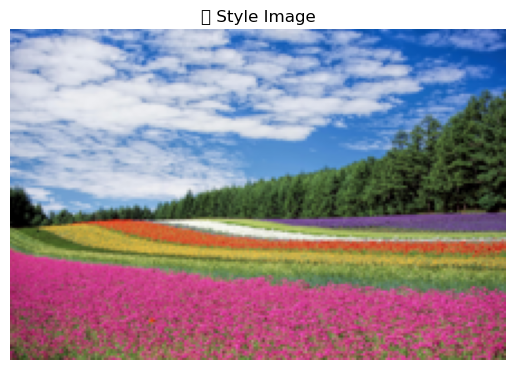

C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


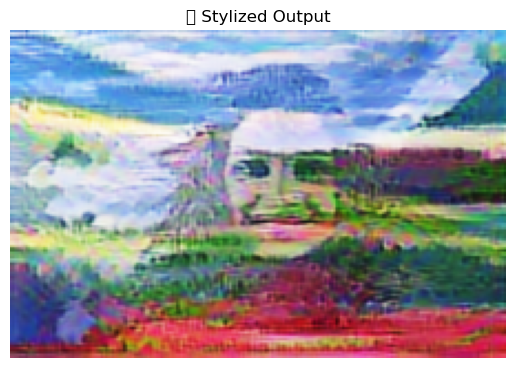

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from PIL import Image
import numpy as np

# Function to load and resize image with dynamic size
def load_image(path, target_size=None):
    img = Image.open(path)
    if target_size:
        img = img.resize(target_size)
    img = np.array(img).astype(np.float32) / 255.0
    img = img[tf.newaxis, ...]
    return tf.constant(img)

# Load content image
content_image = Image.open("contentimg.jpeg")
content_size = content_image.size  # (width, height)
content_image = load_image("contentimg.jpeg", target_size=content_size)

# Load style image (resize to match content image)
style_image = load_image("styleimg.jpg", target_size=content_size)

# Load model
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Run style transfer
stylized_image = hub_model(content_image, style_image)[0]

# Function to show and optionally save image
def show(img, title='Image', save=False, filename="output.jpg"):
    img = tf.squeeze(img)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    if save:
        img = np.array(img * 255).astype(np.uint8)
        Image.fromarray(img).save(filename)
    plt.show()

# Show results
show(content_image, "📸 Content Image")
show(style_image, "🖼️ Style Image")
show(stylized_image, "🎨 Stylized Output", save=True)


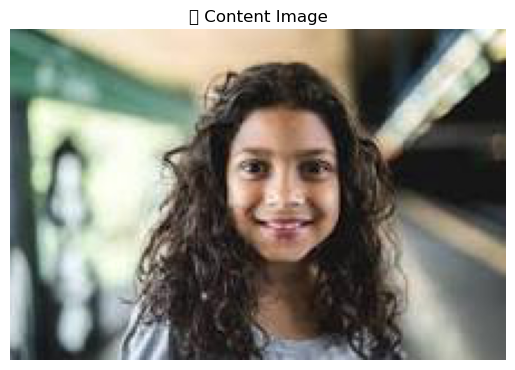

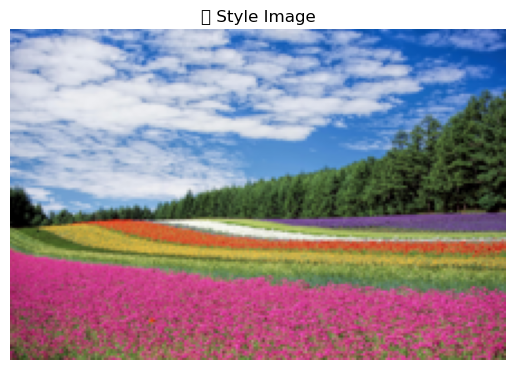

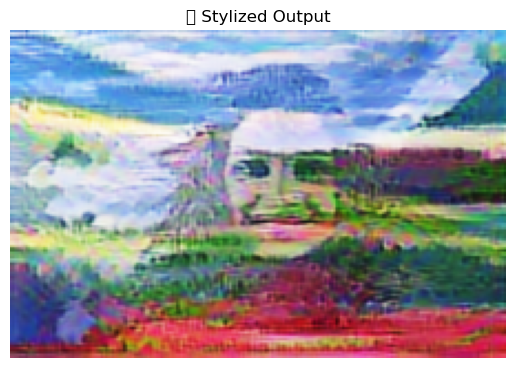

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to load and preprocess image
def load_image(path, target_size=None):
    img = Image.open(path).convert('RGB')  # Ensure 3 channels
    if target_size:
        img = img.resize(target_size)
    img = np.array(img).astype(np.float32) / 255.0  # Normalize to [0, 1]
    img = tf.expand_dims(img, axis=0)  # Add batch dimension
    return tf.constant(img)

# Function to display and optionally save image
def show_image(image_tensor, title='Image', save=False, filename='output.jpg'):
    img = tf.squeeze(image_tensor)  # Remove batch dimension
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    if save:
        img_array = (img.numpy() * 255).astype(np.uint8)
        Image.fromarray(img_array).save(filename)
    plt.show()

# === Load content and style images ===
content_path = 'contentimg.jpeg'
style_path = 'styleimg.jpg'

# Get size of content image to match style image
content_img_raw = Image.open(content_path)
content_size = content_img_raw.size  # (width, height)

content_image = load_image(content_path, target_size=content_size)
style_image = load_image(style_path, target_size=content_size)

# === Load pre-trained style transfer model from TensorFlow Hub ===
model_url = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_model = hub.load(model_url)

# === Apply style transfer ===
stylized_image = hub_model(content_image, style_image)[0]

# === Show and optionally save images ===
show_image(content_image, title='📸 Content Image')
show_image(style_image, title='🖼️ Style Image')
show_image(stylized_image, title='🎨 Stylized Output', save=True, filename='stylized_output.jpg')
